<a href="https://colab.research.google.com/github/Nurdaylight/An-Econ-771/blob/main/PS1/ps1_Nurdaulet_Menglibayev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NO LIBRARIES. URLLIB FOR LOADING DATA, MATPLOTLIB FOR PLOTTING



In [6]:
# save to    /PS1
import urllib.request

url = "https://raw.githubusercontent.com/Nurdaylight/An-Econ-771/main/PS1/data/ps1.csv"
file_path = "/content/ps1.csv"

# Download the file
with urllib.request.urlopen(url) as response:
    content = response.read().decode('utf-8')

with open(file_path, "w") as f:
    f.write(content)

print("Downloaded to", file_path)



#num_runs = 10000
#t = timeit.timeit(invert_matrix, number=num_runs)
#print(f"Average time per run: {t / num_runs * 1e6:.3f} μs")


Downloaded to /content/ps1.csv


### Reading and preparing data as Float instead of STR

In [7]:
with open(file_path, "r") as f:
    next(f)

    data_v = [float(val) for line in f for val in line.strip().split(",")]

#Slice the vector to get each variable

y=data_v[::3]
x1=data_v[1::3]
x2=data_v[2::3]


### Part 2: Plots

Text(0.5, 1.0, 'y vs x2')

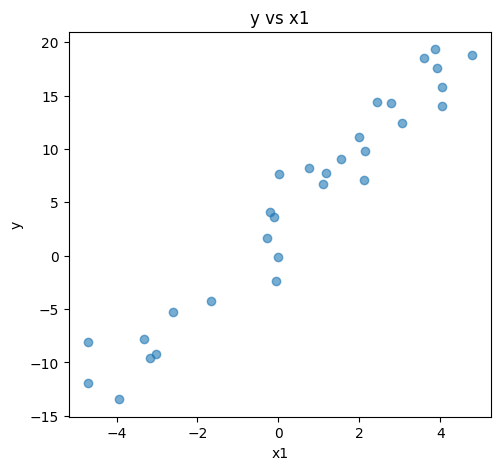

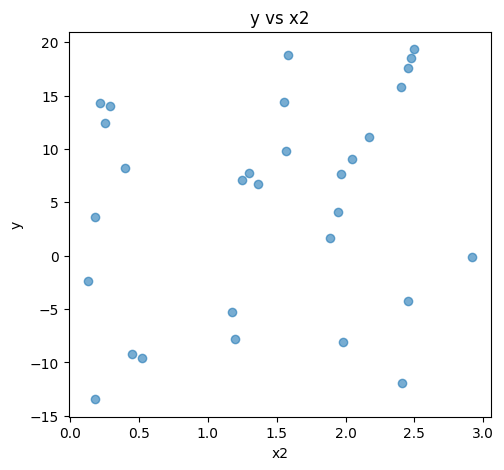

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y, label='Original', alpha=0.6)
plt.xlabel('x1')
plt.ylabel('y')
plt.title('y vs x1')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x2, y, label='Original', alpha=0.6)
plt.xlabel('x2')
plt.ylabel('y')
plt.title('y vs x2')

### Part 3: Estimating coefficients + Part 4 R_sqared

In [9]:

#Find means
l=len(y)

mean_y=sum(y)/l
mean_x1=sum(x1)/l
mean_x2=sum(x2)/l

#Demean
#CAREFUL.
#During loops, code below changes y and x1 thus code above will have new x1 x2 y
y=[v - mean_y for v in y]
x1=[v - mean_x1 for v in x1]
x2=[v - mean_x2 for v in x2]

#Create x'y x'x elements
x1y=x2y=x1x1=x2x2=x1x2=yy=0
for a, b, c in zip(x1, x2, y):
      x1y  += a * c
      x2y  += b * c
      x1x1 += a * a
      x1x2 += a * b
      x2x2 += b * b
      yy+= c*c

#Inversion
inv_det=1/(x1x1*x2x2-x1x2*x1x2)
z=-x1x2*inv_det
#Solution
beta1=x2x2*inv_det*x1y+z*x2y

beta2=z*x1y+x1x1*inv_det*x2y

beta0=mean_y-mean_x1*beta1-mean_x2*beta2
print("        Intercept: ",beta0)
print("Coefficient on x1: ",beta1)
print("Coefficient on x2: ",beta2)

yhat= sum([(a*beta1+b*beta2)**2 for a, b in zip(x1, x2)])
r_squared=yhat/yy
print( "R^2 centered :     ", r_squared)

        Intercept:  1.8013655409730758
Coefficient on x1:  3.4107893360918777
Coefficient on x2:  0.9895123709648741
R^2 centered :  0.9494905591306025


Part 5: Plotting true vs fitted

ValueError: x and y must be the same size

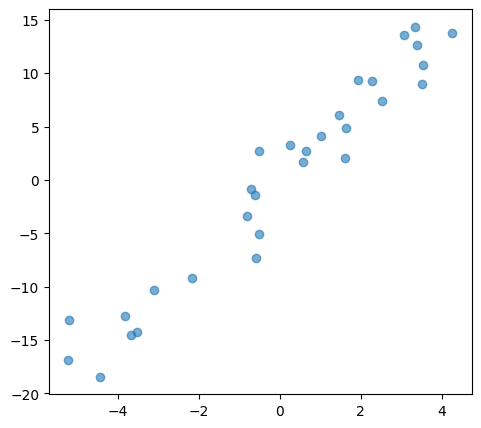

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y, label='Original', alpha=0.6)
plt.scatter(x1, yhat, label='Fitted', alpha=0.6)
plt.xlabel('x1')
plt.ylabel('y')
plt.title('y vs x1')
plt.legend()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x2, y, label='Original', alpha=0.6)
plt.scatter(x2, yhat, label='Fitted', alpha=0.6)
plt.xlabel('x2')
plt.ylabel('y')
plt.title('y vs x2')
plt.legend()

### Part 6: Conclusions

From the intial plot of Y against x2. It seems that it is very hard to predict Y based on x2 using linear function.

Which is true. However, once we control for dimension x1 where we can explain most of variation in y. The linear prediction in x1 dimension, translates to nontrivial predictions in x2 dimension.

To be more precise, linear prediction using 2 covariates, translates to non linear predictions if we are to take single dimensional slices (by integrating out) of our predictions.